#### **Deep & Reinforcement Learning**

#### **Observações**

##### Classificando diferentes tipos de semente de abóbora 🎃🌱

As sementes de abóbora são frequentemente consumidas como confeitos em todo o mundo devido à sua quantidade adequada de proteínas, gorduras, carboidratos e teores minerais. A base de dados **"SementesAbobora.xlsx"** possui um estudo foi realizado nos dois tipos de sementes de abóbora mais importantes e de qualidade, **“Ürgüp Sivrisi”** e **“Çerçevelik”**, geralmente cultivadas nas regiões de Ürgüp e Karacaören na Turquia.

Muitas espécies de sementes têm semelhanças visuais, o que torna a classificação manual difícil e sujeita a erros. Redes neurais podem ser treinadas para identificar padrões que não são facilmente perceptíveis pelo olho humano, aumentando a precisão da classificação.

Imagine que foi proposto para você o desafio de criar uma **inteligência para identificar os tipos de sementes para ajudar a equipe de engenheiros e engenheiras Agrícolas**. Para trabalhar com a precisão dos resultados x complexidade das características de sementes, você optou em utilizar as **redes neurais multilayer perceptron**. Vamos para a aplicação?

**Features**

- Perímetro
- Maior_Eixo_Comprimento
- Comprimento_Eixo_Menor
- Área_Convexa
- Equiv_Diâmetro
- Excentricidade
- Solidez
- Extensão
- Redondeza
- Proporcao
- Compacidade

**Target**
Classes:
 ((A)Çerçevelik, (B)Ürgüp Sivrisi)

##### Classificando cães 🐕 e gatos 🐈

Você já imaginou criar uma rede neural para classificar imagens? As redes neurais convolucionais (CNNs) são amplamente utilizadas em uma variedade de aplicações de visão computacional e processamento de imagens devido à sua capacidade de aprender representações hierárquicas de dados.

Na aula de hoje vamos criar uma rede neural para classificar cães e gatos. Sabemos que para os olhos humanos é fácil a identificação dos animais por meio de algumas diferenças entre ambos, tal como gatos possuem os olhos mais puxadinhos, orelhinhas mais pontudas e entre outras características. Mas também sabemos que temos cães que podem ter características semelhantes ao gato, tal como a orelhinha pontuda, cauda longa, e entre outras características. Será que a rede neural consegue distinguir os animais? Vamos codar e descobrir juntos!!

##### Como criar ambientes para evitar conflito:  
https://github.com/RicardViana/fiap-data-viz-and-production-models/blob/main/Roteiro%20para%20cria%C3%A7%C3%A3o%20de%20ambiente.pdf

#### **Conteúdo - Bases e Notebook da aula**

Github:  
https://github.com/FIAP/Pos_TecDTAT/tree/DeepLearning

#### **Importação de bibliotecas**

In [ ]:
#Importar biblioteca completa
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import cv2

#Importar algo especifico de uma biblioteca
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# keras libraries
from tensorflow import keras
from keras import models
from keras import layers
from keras import metrics
from keras.optimizers import Adam
from keras.metrics import Precision
from tqdm.keras import TqdmCallback
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout, Conv2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from pathlib import Path


#### **Funções (def)**

#### **Aula 1 - Perceptron de múltiplas camadas**

In [2]:
#Importar base de dados

link = 'https://github.com/RicardViana/fiap-Deep-Learning-and-unstructured-data/raw/refs/heads/main/SementesAbobora.xlsx'
df = pd.read_excel(link)

In [3]:
#Ver os primeiros dados

df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,(A) Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,(A) Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,(A) Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,(A) Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,(A) Çerçevelik


In [4]:
#Ver os ultimos dados

df.tail()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,(B) Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,(B) Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,(B) Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,(B) Ürgüp Sivrisi
2499,84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,(B) Ürgüp Sivrisi


In [5]:
#Ver a qtd de linhas e colunas da data frame
df.shape

(2500, 13)

In [6]:
#Como a base de dados possui os dados de classes de forma ordenada, isso pode ser um problema para o aprendizado de máquina e dessa forma é preciso embaralhar os dados com o comando shuffle.

'''

Se o que você quer prever é uma categoria (nome, grupo, "sim/não"), você está lidando com Classes.

Se o que você quer prever é um número contínuo (preço de uma casa, temperatura, valor do dólar), você está lidando com Regressão.

'''

df = shuffle(df)

In [7]:
#Verificar os dados embaralhados
df.head()

,Area,Perímetro,Maior_Eixo_Comprimento,Comprimento_Eixo_Menor,Área_Convexa,Equiv_Diâmetro,Excentricidade,Solidez,Extensão,Redondeza,Proporcao,Compacidade,Class
2087,115744,1430.169,612.3201,241.1586,116606,383.8878,0.9192,0.9926,0.6971,0.7111,2.5391,0.6269,(B) Ürgüp Sivrisi
897,77786,1044.115,399.3788,248.7085,78364,314.7065,0.7824,0.9926,0.7295,0.8966,1.6058,0.7880,(A) Çerçevelik
738,84259,1139.639,456.0281,235.6990,84990,327.5391,0.8561,0.9914,0.7520,0.8153,1.9348,0.7182,(A) Çerçevelik
1824,50822,917.530,381.4619,170.2289,51648,254.3788,0.8949,0.9840,0.6649,0.7586,2.2409,0.6669,(B) Ürgüp Sivrisi
220,64088,951.711,357.6842,229.8545,64658,285.6560,0.7662,0.9912,0.7408,0.8892,1.5561,0.7986,(A) Çerçevelik


In [8]:
#Ver o equilibrio da base de dados
df['Class'].value_counts()

Class
(A) Çerçevelik       1300
(B) Ürgüp Sivrisi    1200
Name: count, dtype: int64

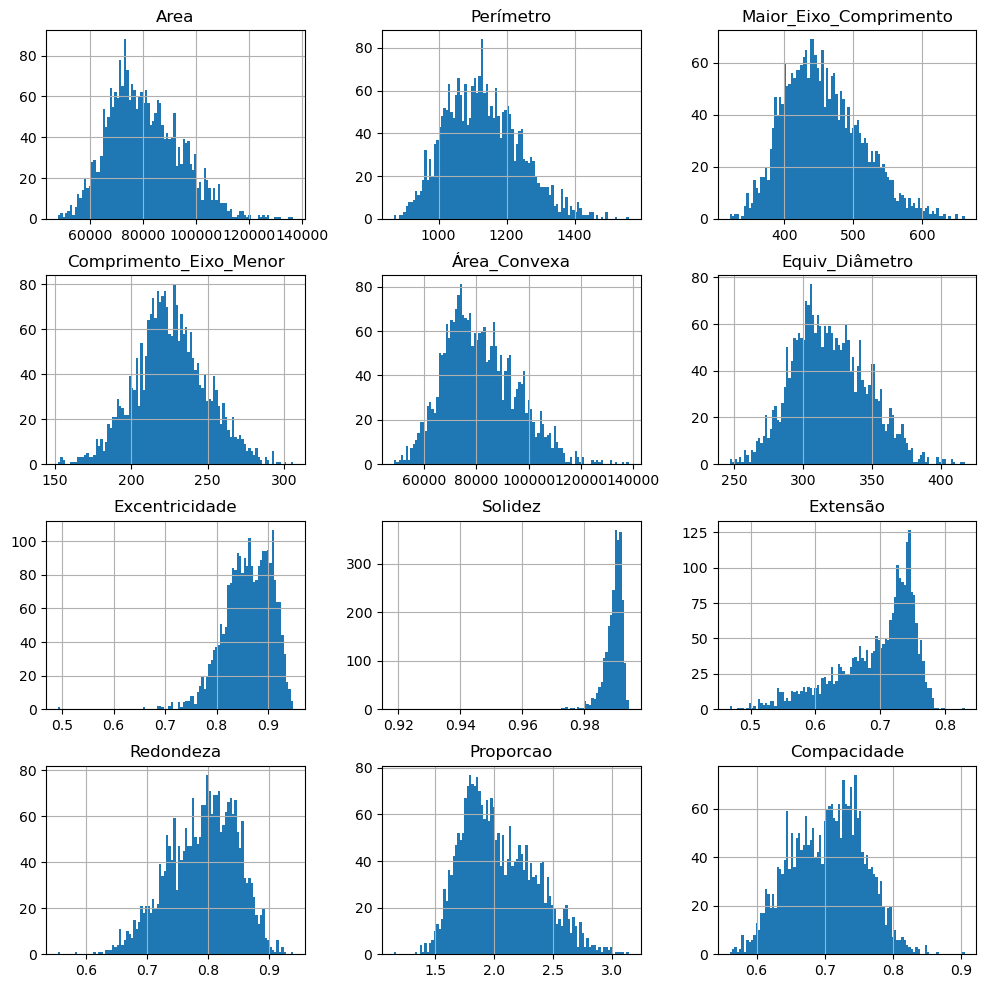

In [9]:
#Potando histogramas para analisar a simetria dos dados
df.hist(bins=100, figsize=(12, 12))
plt.show()

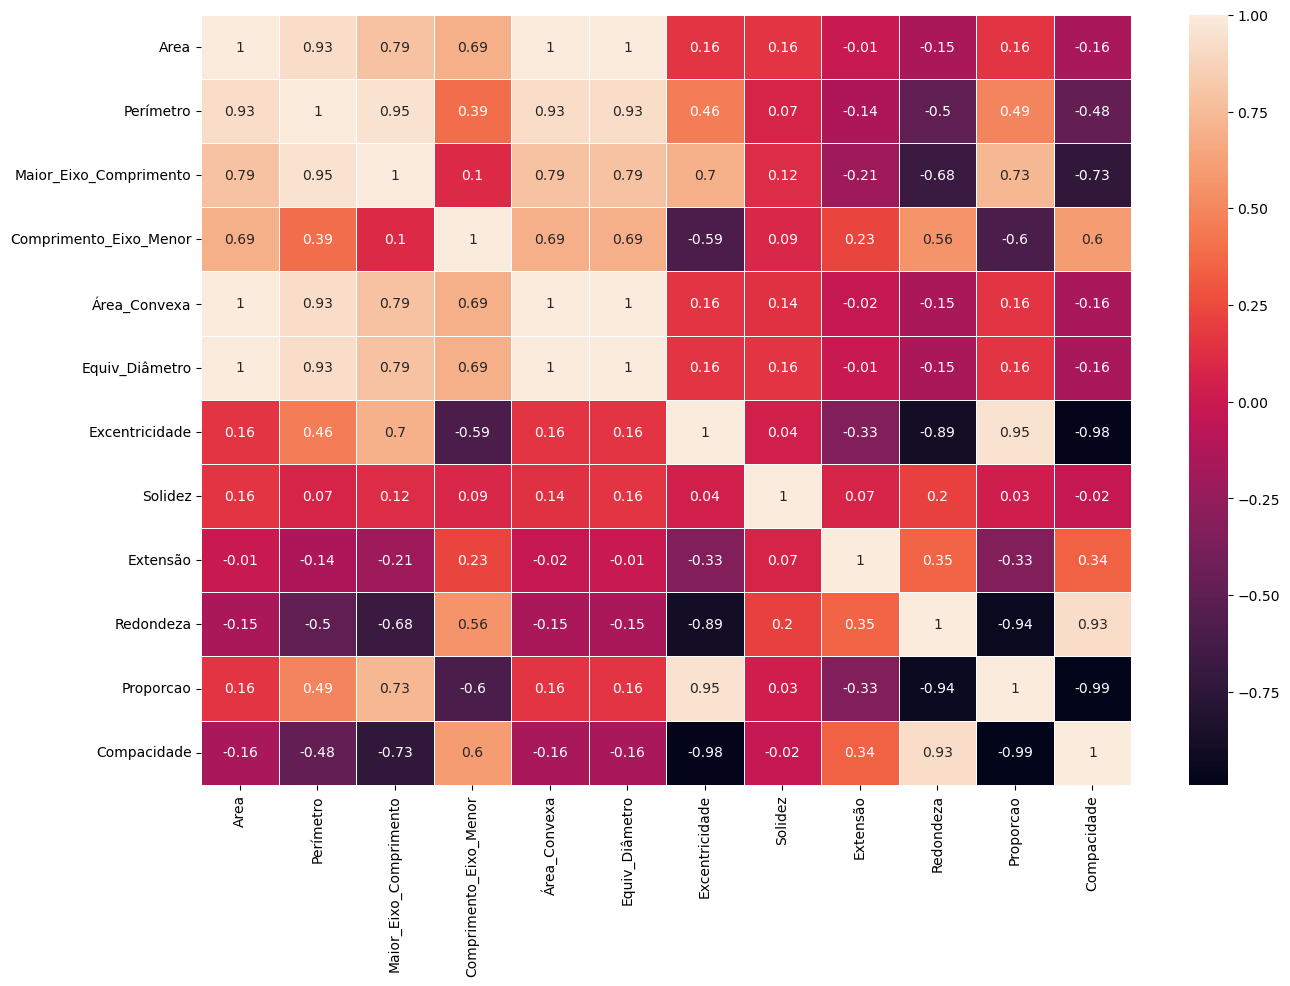

In [10]:
#Verificar a correlação dos dados
correlation_matrix = df.select_dtypes(include='number').corr().round(2)

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [11]:
#Ver a info dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 2087 to 995
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    2500 non-null   int64  
 1   Perímetro               2500 non-null   float64
 2   Maior_Eixo_Comprimento  2500 non-null   float64
 3   Comprimento_Eixo_Menor  2500 non-null   float64
 4   Área_Convexa            2500 non-null   int64  
 5   Equiv_Diâmetro          2500 non-null   float64
 6   Excentricidade          2500 non-null   float64
 7   Solidez                 2500 non-null   float64
 8   Extensão                2500 non-null   float64
 9   Redondeza               2500 non-null   float64
 10  Proporcao               2500 non-null   float64
 11  Compacidade             2500 non-null   float64
 12  Class                   2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 273.4+ KB


In [12]:
# Utilizando LabelEncoder para transformar/converter rótulos de texto em números referente a variavel target
le = LabelEncoder()

# Sobrescrever a coluna Class
df.Class = le.fit_transform(df['Class'])

In [13]:
# Verificar apenas os dados distitos
set(df['Class'])

{0, 1}

In [14]:
# Separar os dados 
X = df[['Area','Perímetro', 'Comprimento_Eixo_Menor','Excentricidade','Solidez','Extensão','Redondeza', 'Proporcao', 'Compacidade']]
y = df['Class']

In [15]:
# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
# Pré-processamento dos dados

'''

Apesar de deep learning não requerer distribuições normais, é comum aplicar técnicas de pré-processamento de dados para normalizar ou padronizar as características. 
Isso pode ajudar a acelerar a convergência do treinamento da rede neural.
A convergência está relacionada com o erro, ou seja, o quanto a sua rede aprende a corrigir os erros durante o processamento.

'''

# Ajustar os dados (Fit)
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

,copy,True
,with_mean,True
,with_std,True


In [17]:
# Transformar os dados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Ver os dados de treino
X_train

array([[-1.40110114, -1.53578515, -0.81317237, ...,  0.85572724,
        -0.72070452,  0.69477424],
       [-1.34355582, -0.95509001, -1.84745822, ..., -0.84073758,
         0.93944613, -0.95552087],
       [-1.14408451,  0.46801328, -2.21224067, ..., -3.78332636,
         2.66629927, -2.56994   ],
       ...,
       [-0.71141831, -0.29375435, -1.34333307, ..., -0.95106206,
         1.03966097, -1.03860209],
       [-1.12679221, -1.03923933, -0.95104245, ...,  0.07441295,
        -0.15550572,  0.04711838],
       [-1.75189799, -1.85155163, -1.30569008, ...,  0.74901997,
        -0.55829848,  0.50028866]], shape=(2000, 9))

In [19]:
# Ver a quantidade de linhas e colunas da base de treino
X_train.shape

(2000, 9)

In [20]:
# Ver o tipo do dado
type(X_train)

numpy.ndarray

In [21]:
# Ver a quantidade de linhas e colunas da base de teste
X_test.shape

(500, 9)

In [22]:
# Ver o tipo do dado
type(X_test)

numpy.ndarray

In [23]:
#Moldando nossas variáveis resposta

'''

A nossas classes estão em um formato de estrutura de dados unidimensional (assim como uma coluna) e precisamos moldar para o formato de array -n dimensional(matriz).
O comando reshape é utilizado para reformatar a estrutura de um array multidimensional, como um tensor, que é a estrutura de dados fundamental usada em deep learning e processamento de dados em redes neurais.

'''

# Ver o tipo do dado
type(y_train)

pandas.core.series.Series

In [24]:
# reshape() molda uma matriz sem alterar os dados da matriz

'''

O que o .reshape((-1, 1)) faz?

Imagine que os dados originais sejam uma lista simples: [0, 1, 0, 1] e para o Python, isso é um vetor de uma única dimensão (1D). 
No entanto, bibliotecas como o TensorFlow ou Scikit-Learn geralmente exigem que os dados de entrada tenham duas dimensões: uma para as linhas (amostras) e outra para as colunas (características).

* O número 1: Diz ao NumPy que queremos que o resultado final tenha exatamente 1 coluna.
* O número -1: Esse é um "coringa". Ele diz ao NumPy: "Calcule automaticamente quantas linhas são necessárias para que todos os dados caibam nessa 1 coluna".

O passo a passo da linha inteira

O comando abaixoé uma "super instrução" que faz três coisas:

1. np.asarray(y_train): Garante que o dado seja um array do NumPy (caso ele venha de uma lista ou de uma coluna do Pandas).
2. .astype('float32'): Converte os números para o formato de ponto flutuante de 32 bits. Computacionalmente, as GPUs e CPUs processam cálculos de Redes Neurais muito mais rápido em float32 do que em números inteiros ou float64.
3. .reshape((-1, 1)): Transforma o vetor de "deitado" (1D) para "em pé" (2D), como uma coluna de uma tabela.

Por que isso é necessário?

A maioria dos modelos de Deep Learning (como os do Keras/TensorFlow) espera que o seu `y` (o que você quer prever) tenha o formato (número_de_amostras, número_de_saídas).

Mesmo que você só tenha uma saída (0 ou 1), o modelo espera que essa saída esteja dentro de uma estrutura de "coluna", e não apenas uma lista solta.

'''

y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [25]:
# Ver o tipo do dado após o reshape
type(y_train)

numpy.ndarray

In [26]:
# Ver a qtd de linhas e colunas
y_train.shape

(2000, 1)

In [27]:
# Semente aleatória para reprodutibilidade
tf.random.set_seed(7)

# Definindo dimensões
input_dim = X_train.shape[1] 
output_dim = y_train.shape[1]
batch_size = 20

# Abrindo a sequência do modelo
model = models.Sequential()

# Definindo a camada de entrada explicitamente
model.add(layers.Input(shape=(input_dim,)))

# Camada densa inicial (agora sem o parâmetro input_shape)
model.add(layers.Dense(batch_size, activation='relu'))

# Camadas ocultas
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(6, activation='relu'))

# Regularização
model.add(layers.Dropout(0.5))

# Camada de saída
# Usamos sigmoid porque é uma classificação binária (0 ou 1)
model.add(layers.Dense(output_dim, activation='sigmoid'))

# Configuração do otimizador e compilação
learning_rate = 0.001
otimizador = Adam(learning_rate=learning_rate)

model.compile(loss='binary_crossentropy', optimizer=otimizador, metrics=['accuracy'])

# Visualizar a arquitetura
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 537 (2.10 KB)

 Trainable params: 537 (2.10 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Executar as épocas de processamento para a rede treinar e encontrar o menor erro
# Configurando as épocas de processamento para a convergência do erro da função de custo
epoch = 100

hist = model.fit(X_train
                  ,y_train
                  ,epochs = epoch
                  ,batch_size=batch_size
                  ,shuffle=True
                  ,validation_data=(X_test, y_test)
                  ,verbose=0
                  ,callbacks=[TqdmCallback(verbose=0)]
          )


0epoch [00:00, ?epoch/s]

In [29]:
# Plotar a acurácia
acc = '{:.2%}'.format(hist.history['accuracy'][-1])
print(f"O modelo possui uma acurácia de {acc} com {epoch} epochs de processamento")

O modelo possui uma acurácia de 84.15% com 100 epochs de processamento


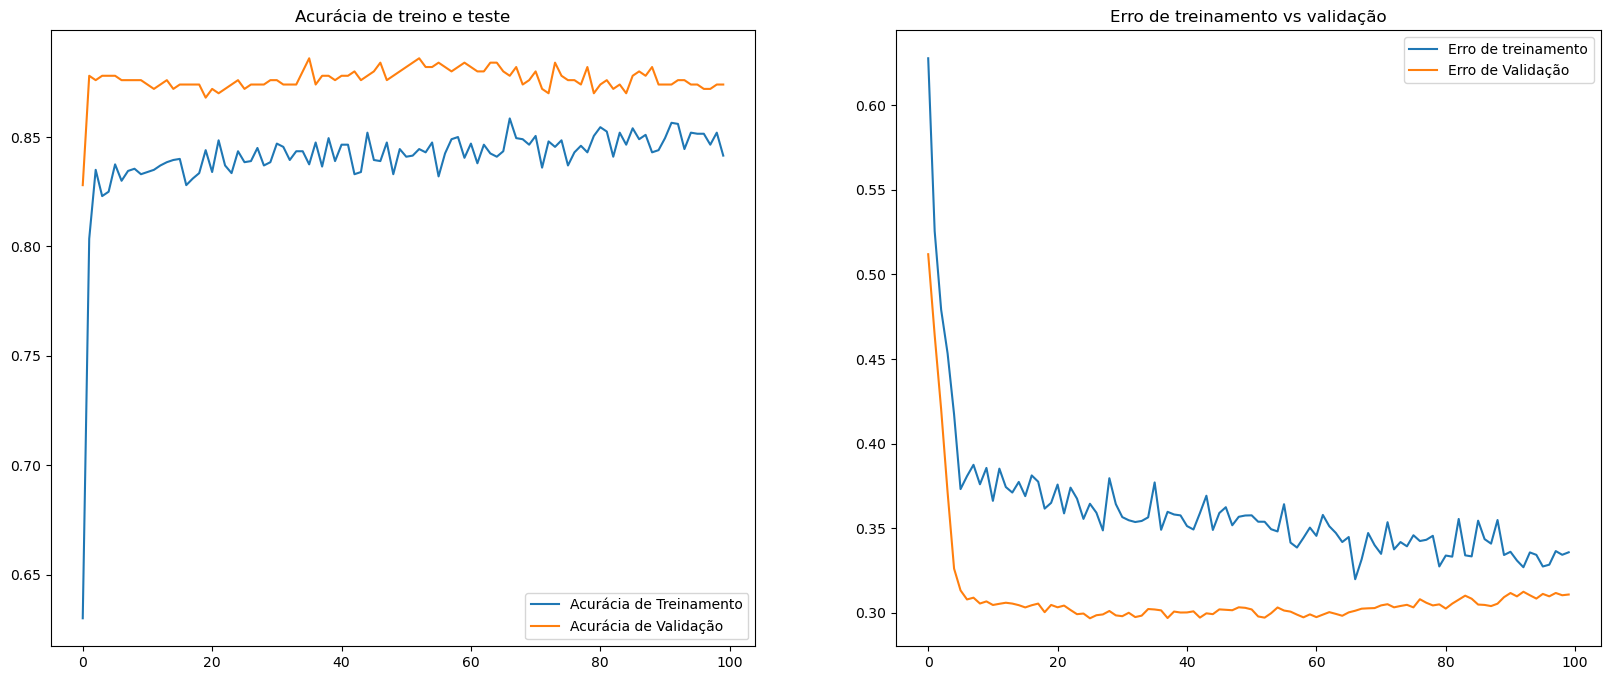

In [30]:
# Validar o modelo

'''

É muito importante comparar a performance do modelo tanto na base de treinamento quanto de validação. 
Para isso vamos plotar dois gráficos para acompanhar a performance do modelo pelas épocas de processamento.

'''

# Visualizando os resultados de treino
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epoch)

# Plot Acurácia
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treinamento')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de treino e teste')

# Plot Erro de treinamento
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Erro de treinamento')
plt.plot(epochs_range, val_loss, label='Erro de Validação')
plt.legend(loc='upper right')
plt.title('Erro de treinamento vs validação')
plt.show()

In [31]:
# Gerar o report

# Predictions
y_pred = model.predict(X_test)
y_pred_class = [round(x[0]) for x in y_pred]
y_test_class = y_test

# classification report
class_names = []
for i in y.unique():
    class_names.append(le.inverse_transform([i])[0])

print(classification_report(y_test_class, y_pred_class, target_names=class_names))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
                   precision    recall  f1-score   support

(B) Ürgüp Sivrisi       0.86      0.91      0.88       264
  (A) Çerçevelik        0.89      0.83      0.86       236

         accuracy                           0.87       500
        macro avg       0.88      0.87      0.87       500
     weighted avg       0.88      0.87      0.87       500



#### **Aula 2 - Redes convolucionais**

#### **Aula 3 - Transferência de aprendizagem**

#### **Aula 4 - Redes recorrentes**

#### **Aula 5 - Redes não supervisionadas**

#### **Aula 6 - Gans**